## SI 618 Final Project Report

Emma Brennan-Wydra (ebwydra)
<br>Due April 22, 2019

### Motivation

<p>The <a href='https://socialjusticesexuality.com/'>Social Justice Sexuality Project</a> is a national survey of Black, Latinx, and Asian and Pacific Islander, and multiracial lesbian, gay, bisexual, and transgender (LGBT) people. While LGBT people of color are often pathologized (or ignored!) in the research literature, the aim of the Social Justice Sexuality Project is to document and celebrate the experiences of this population by collecting information relating to five themes: racial and sexual identity, spirituality and religion, mental and physical health, family formations and dynamics, and civic and community engagement.
<p>I wanted to explore this dataset for my final project because I believe that the lives of LGBT people of color should be celebrated and that their voices and experiences should be amplified. The four questions I set out to answer are:
<p>Q1. Are LGBT people who are more religious less likely to be “out” to their families, friends, and other people?
<p>Q2. Is it possible to predict someone's sexual identity with reasonable accuracy based on their stances on issues affecting LGBT people?
<p>Q3. Do older LGBT people of color tend to be more politically conservative?
<p>Q4. When respondents are clustered based on their patterns of involvement in LGBT and POC groups, organizations, and activities, are the resulting clusters diverse with respect to age? What are the characteristics of the clusters?

### Data Source

I am using the following dataset: Social Justice Sexuality Project: 2010 National Survey, including Puerto Rico (ICPSR 34363). I downloaded the dataset from ICPSR (https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34363/summary) as a delimited (tsv, tab-separated) file. 
<p>The dataset includes 2010 survey responses from close to 5,000 LGBT people of color, with about 300 variables corresponding to survey questions and other indicators (e.g., whether the respondent took the survey online or on paper). Quite a few of the variables have been blanked by ICSPR to maintain the confidentiality of the respondents.
<p>The 10-page survey instrument used to collect the data included questions about a wide range of topics, including spirituality and religion, mental and physical health, racial and sexual identity, and more. Additional information about the Social Justice Sexuality Project can be found on the project website: <a href='http://socialjusticesexuality.com/'>http://socialjusticesexuality.com/</a>.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
data = pd.read_csv('data/34363-0001-Data.tsv', delimiter='\t')

In [4]:
# 4,953 rows/observations, 304 columns
data.shape

(4953, 304)

In [5]:
data.head()

,cid,sjsid,paper,spanish,g1,q1a,q1b,q1c,q2a1,q2a2,...,dnativeam,dwhite,dorace,age18,filter_black,q17d_medical,filter_hispanic,filter_asian,fq15b,fq15c
0,,10010918,0,0,,1,1,2,Blanked for Confidentiality - ICPSR ADDED,Blanked for Confidentiality - ICPSR ADDED,...,0,0,0,9,1,1,0,0,3,3
1,,11020115,1,0,,9,9,9,Blanked for Confidentiality - ICPSR ADDED,Blanked for Confidentiality - ICPSR ADDED,...,0,0,0,9,1,0,0,0,5,2
2,,10010505,0,0,,6,3,3,Blanked for Confidentiality - ICPSR ADDED,Blanked for Confidentiality - ICPSR ADDED,...,0,0,0,9,1,1,0,0,4,3
3,81,24010008,1,0,,4,3,1,Blanked for Confidentiality - ICPSR ADDED,Blanked for Confidentiality - ICPSR ADDED,...,0,0,0,9,1,1,0,0,6,5
4,,17030122,1,0,,1,6,6,Blanked for Confidentiality - ICPSR ADDED,Blanked for Confidentiality - ICPSR ADDED,...,0,0,0,9,1,1,0,0,4,5


### Methods

#### Q1. Are LGBT people who are more religious less likely to be “out” to their families, friends, and other people?

This question touches on two constructs: how religious the respondent is, and whether or not they are out in different contexts. Each of these constructs is measured by multiple variables in the dataset.

##### Religiosity (5 items)
_Response scale: 1=Strongly disagree, 2=Disagree, 3=Agree, 4=Strongly agree, 9 and . = missing_
<p>q11a: "I pray daily" 
<br>q11b: "I look to my faith as providing meaning and purpose in my life" 
<br>q11c: "I consider myself active in my faith or religious institution"
<br>q11d: "I enjoy being around others who share my faith"
<br>q11e: "My faith impacts many of my decisions"

##### Outness (5 items)
_Response scale: 1=None, 2=Some, 3=About half, 4=Most, 5=All, 8=Not applicable, 9 and . = missing_
<p>q14a: "How many people within the following communities are you out to? Family"
<br>q14b: "How many people within the following communities are you out to? Friends"
<br>q14d: "How many people within the following communities are you out to? Coworkers"
<br>q14e: "How many people within the following communities are you out to? People in neighborhood"
<br>q14f: "How many people within the following communities are you out to? People online"
    
<p>I decided to omit q14c ("How many people within the following communities are you out to? Religious community") because it wouldn't apply to non-religious people.

I used linear regression to answer this question. First, I removed anyone from the dataset who was missing responses for any of the above questions about religion and being out, considering a missing value or a value of 8 or 9 as a missing response. Then, I computed mean scores for "religiosity" and "outness" based on the component items from each construct. Next, I ran a regression with the mean "outness" score as the outcome and mean "religiosity" score as the predictor.

#### Q2. Is it possible to predict someone's sexual identity with reasonable accuracy based on their stances on issues affecting LGBT people?

The variable 'q18c' corresponds to sexual identity, with the following categorical scale: 1=Gay, 2=Lesbian, 3=Bisexual, 4=Two Spirit, 5=Queer, 6=In the life, 7=Same gender loving, 8=Straight/Heterosexual, 9=Macha/o, 10=Activa/o, 11=Pasiva/o, 12=Other, 99 or . = missing. Gay and lesbian are the most commonly selected identities in the dataset, while activa/o and pasiva/o are the least.

The following 10 variables relate to stances on LGBT issues:
<p>q2b: To what degree are LGBT organizations addressing [the three most important issues facing you]? 
<br>q3b: To what degree are LGBT organizations addressing [the three most important issues facing LGBT communities of color?
<br><i>(1 = Not doing enough, 3 = Doing just the right amount, 5 = Doing too much, 9 or . = missing)</i>
<p>q4a: Do you think gays and lesbians in the military should be legalized?
<br>q4c: Do you think that same-sex marriage should be legalized?
    <br><i>(0 = No, 1 = Yes, 9 = missing)</i>
<p>q7a: In your opinion, to what degree are mainstream LGBT organizations addressing: Racial justice / equality?
<br>q7b: In your opinion, to what degree are mainstream LGBT organizations addressing: Economic justice / equality?
<br>q7c: In your opinion, to what degree are mainstream LGBT organizations addressing: Gender equality?
<br>q7d: In your opinion, to what degree are mainstream LGBT organizations addressing: Disability rights?
<br>q7e: In your opinion, to what degree are mainstream LGBT organizations addressing: Age discrimination?
<br>q7f: In your opinion, to what degree are mainstream LGBT organizations addressing: Electing LGBT political officials?
    <br><i>(1 = Not doing enough, 2 = Doing just the right amount, 3 = Doing too much, 8 = This is not a LGBT issue, 9 or . = missing)</i>

In order to answer my question, I decided to build a random forest classifier. First, I filled in dummy values for missing data where they didn't occur already. After that, I examined the value_counts() of the different sexual identity categories and pulled out only the three most common for analysis: gay (N = 1,775), lesbian (N = 1,108), and bisexual (N = 527). Next, I divided the data into training and testing datasets. Using the training dataset, I trained a random forest classifier to predict sexual identity based on responses to the above questions. Then, I used my classifier to predict identities for respondents in the testing dataset. I measured my success by examining the percentage of identities it predicted correctly, as well as looking at a crosstab of the actual and predicted identities.

#### Q3. Do older LGBT people of color tend to be more politically conservative?

The relevant variables here are q21a ("Thinking about politics, which of the following best describes your political views?", where 1 = Very liberal and 6 = Very conservative) and q18g ("What year were you born?"). In order to answer this question, I removed any observations where either a birth year or an answer to q21a was missing. I then looked at the distribution of birth years and created a new indicator variable "young" that takes on a value of 1 if the respondent was born after 1977 (the median birth year) and a value of 0 if the respondent was born in or before 1977. Next, I visualized the distributions of answers to q21a for each of the two categories using a box plot and a violin plot, and I used a t-test to compare group means, where a significant t-test p-value would indicate that there is a statistically significant difference in group means between younger and older people.

#### Q4. When respondents are clustered based on their patterns of involvement in LGBT and POC groups, organizations, and activities, are the resulting clusters diverse with respect to age? What are the characteristics of the clusters?

Bear with me for a minute. The original motivation for this question was to create some sort of algorithmic "friend finder" that would cluster people with similar lifestyles/interests. Not all of the variables in the dataset, however, would be appropriate for forming these clusters. For example, we wouldn't necessarily want to cluster people with similar income or race/ethnicity, which one would hope are not so important in friendships. I selected a subset of variables that pertained to patterns of involvement in groups, organizations, and activities for LGBT people of any race (q8a-f), for POC people of any gender/sexual identity (q9a-f), and for LGBT POC people. The idea was that people with similar patterns of responses to these questions might be compatible as friends. The questions in each of these blocks were:
<p><i>Thinking about [LGBT/POC/LGBTPOC] groups, organizations, and activities in general, during the past 12 months, how often have you:</i>
<br>a: Participated in political events (e.g., a march, rally, etc.)?
<br>b: Participated in social or cultural events (e.g., clubs, movies, restaurants, etc.)?
<br>c: Read newspapers or magazines?
<br>d: Used the internet (e.g., medical, counseling, food, etc.)?
<br>e: Received goods and/or services (e.g., medical counseling, food, etc.)?
<br>f: Donated money to an organization?
<p><i>1=Never, 2=Once or twice a year, 3=About 6 times a year, 4=About once a month, 5=About once a week, 6=More than once a week</i>
<p>After filtering out missing reponses, I used K-means clustering to create the clusters based on responses to these 18 (6 * 3) items. In order to figure out how many clusters to use, I examined silhouette plots and scores for a range of values of k, as well as the percentage of variance explained visualized on a scree plot. After I made the clusters, I computed mean LGBT/POC/LGBTPOC involvement scores based on responses for each set of questions, and examined differences in these mean scores by cluster. Because I thought patterns of involvement might differ by age, I also looked at the distribution of birth years for the most and least involved clusters.

### Analysis and Results

#### Q1. Are LGBT people who are more religious less likely to be “out” to their families, friends, and other people?

##### Annotated Code

In [6]:
# creating a dataset with only the relevant columns
data_q1 = data[['q11a','q11b','q11c','q11d','q11e','q14a','q14b','q14d','q14e','q14f']]
data_q1.head()

,q11a,q11b,q11c,q11d,q11e,q14a,q14b,q14d,q14e,q14f
0,2,2,2,2,2,1,2,1,1,2
1,3,3,2,3,2,3,5,5,4,4
2,4,3,3,3,3,4,3,2,8,2
3,3,4,3,4,4,2,5,1,2,3
4,1,2,3,2,1,2,5,5,3,5


In [7]:
# replacing blank cells with 0s and converting to int
data_q1 = data_q1.replace(to_replace=" ", value="0").astype(int)

In [8]:
# summary statistics for selected variables
data_q1.describe()

,q11a,q11b,q11c,q11d,q11e,q14a,q14b,q14d,q14e,q14f
count,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000
mean,2.591359,2.775086,2.438320,2.732082,2.668080,3.989905,4.441147,4.035534,3.652130,4.289522
std,1.403673,1.379038,1.421861,1.391431,1.395261,1.894933,1.632731,2.152400,2.259052,2.032094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [9]:
# dropping missing/NA data: values 0, 8, and 9
col_names = data_q1.columns.tolist()
for col in col_names:
    data_q1 = data_q1[data_q1[col] != 0]
    data_q1 = data_q1[data_q1[col] != 8]
    data_q1 = data_q1[data_q1[col] != 9]

In [10]:
data_q1.describe() # great, looking better, although we're down to 3,620 observations

,q11a,q11b,q11c,q11d,q11e,q14a,q14b,q14d,q14e,q14f
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000
mean,2.610497,2.788674,2.443646,2.743094,2.677072,3.732044,4.229282,3.563536,3.159945,3.846961
std,1.179263,1.133203,1.136875,1.071508,1.117508,1.432084,1.144891,1.551224,1.613393,1.425037
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,5.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df_relig = data_q1.drop(labels=['q14a','q14b','q14d','q14e','q14f'], axis=1)
religiosity = df_relig.mean(axis=1)
# religiosity.describe()

df_out = data_q1.drop(labels=['q11a','q11b','q11c','q11d','q11e'], axis=1)
outness = df_out.mean(axis=1)
# outness.describe()

data_q1['religiosity'] = religiosity # mean of religion vars
data_q1['outness'] = outness # mean of out vars
data_q1.head()

,q11a,q11b,q11c,q11d,q11e,q14a,q14b,q14d,q14e,q14f,religiosity,outness
0,2,2,2,2,2,1,2,1,1,2,2.0,1.4
1,3,3,2,3,2,3,5,5,4,4,2.6,4.2
3,3,4,3,4,4,2,5,1,2,3,3.6,2.6
4,1,2,3,2,1,2,5,5,3,5,1.8,4.0
5,4,4,4,4,4,4,5,5,5,5,4.0,4.8


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
# mean outness as a function of mean religiosity
model_outness = smf.ols('outness ~ religiosity', data=data_q1).fit()
model_outness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.728
Date:                Thu, 11 Apr 2019   Prob (F-statistic):            0.00547
Time:                        14:30:04   Log-Likelihood:                -5744.1
No. Observations:                3620   AIC:                         1.149e+04
Df Residuals:                    3618   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8501      0.055     69.587      0.000       3.742       3.959
religiosity    -0.0542      0.019     -2.780      0.005      -0.092      -0.016
==============================================================================
Omnibus:                      552.653   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.623
Skew:                          -0.549   Prob(JB):                     4.73e-64
Kurtosis:                       2.146   Cond. No.                         8.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Answer

The linear regression model of outness as a function of religiosity overall was significant overall at the p < 0.01 level, indicating that the model had some predictive significance; that is, we reject the null hypothesis that there is no relationship between mean religiosity and mean outness. The coefficient for religiosity was negative (-0.0542) which means that a higher religiosity score is associated with a lower outness score, and vice versa. 

<p>In short, this model suggests that being more religious and being out to more people across different social contexts are negatively related, so the answer to Q1 is "yes". The R-squared of the model, however, is very small (0.002), suggesting that religiosity explains only a small percentage in the variance of outness. In addition, the joint plot shows that the relationship is not exactly linear:

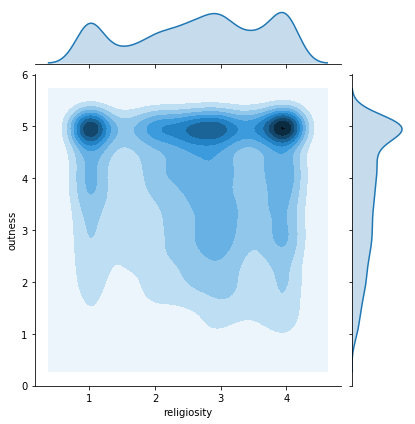

In [14]:
sns.jointplot(data_q1.religiosity, data_q1.outness, kind='kde')

#### Q2. Is it possible to predict someone's sexual identity with reasonable accuracy based on their stances on issues affecting LGBT people?

##### Annotated Code

In [15]:
from sklearn.model_selection import train_test_split
import sklearn.ensemble as skens
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [16]:
# making a dataset with only the relevant variables for this question
data_q2 = data[['q18c', 'q2b', 'q3b', 'q4a', 'q4c', 'q7a', 'q7b', 'q7c', 'q7d', 'q7e', 'q7f']]
data_q2.head()

,q18c,q2b,q3b,q4a,q4c,q7a,q7b,q7c,q7d,q7e,q7f
0,5,1,1,1,1,1,1,2,2,2,2
1,3,9,9,9,1,1,1,1,1,1,2
2,1,3,1,1,1,2,2,2,2,2,2
3,2,1,1,1,1,1,1,2,1,2,1
4,2,,9,1,1,2,2,2,2,2,1


In [17]:
# filling missing values with 9s and converting to int
data_q2_clean = data_q2.ix[:,1:].replace(to_replace=" ", value="9").astype(int)
data_q2_clean['actual_identity'] = data_q2.q18c.replace(to_replace=" ", value="99").astype(int)
data_q2_clean.head()

,q2b,q3b,q4a,q4c,q7a,q7b,q7c,q7d,q7e,q7f,actual_identity
0,1,1,1,1,1,1,2,2,2,2,5
1,9,9,9,1,1,1,1,1,1,2,3
2,3,1,1,1,2,2,2,2,2,2,1
3,1,1,1,1,1,1,2,1,2,1,2
4,9,9,1,1,2,2,2,2,2,1,2


In [18]:
# checking out the counts of different sexual identity categories
data_q2_clean.actual_identity.value_counts()

1     1775
2     1108
3      527
8      412
5      321
7      237
99     183
12     161
4      107
6       86
9       27
11       5
10       4
Name: actual_identity, dtype: int64

In [19]:
# let's just use the top three categories: 1=Gay, 2=Lesbian, 3=Bisexual
data_q2_lgb = data_q2_clean[(data_q2_clean.actual_identity == 1) | 
                            (data_q2_clean.actual_identity == 2) | 
                            (data_q2_clean.actual_identity == 3)]

data_q2_lgb.actual_identity.value_counts()

1    1775
2    1108
3     527
Name: actual_identity, dtype: int64

In [20]:
# splitting into testing and training datasets
data_q2_train,data_q2_test = train_test_split(data_q2_lgb, test_size=0.3)
print(data_q2_train.shape) # (2387, 11)
print(data_q2_test.shape) # (1023, 11)

(2387, 11)
(1023, 11)


In [21]:
data_q2_train.ix[:,:-1].head() # leaving out sexual identity column for training the random forest

,q2b,q3b,q4a,q4c,q7a,q7b,q7c,q7d,q7e,q7f
4778,9,1,1,1,1,1,2,2,1,2
3253,3,2,1,1,1,1,1,1,1,2
1100,2,2,1,1,1,1,1,1,1,1
3004,3,9,1,1,2,1,2,1,2,3
4513,3,3,1,1,2,2,2,1,1,1


In [22]:
# build a random forest classifier
rf_model = skens.RandomForestClassifier(n_estimators=100,oob_score=True, criterion='entropy')
rf_model.fit(data_q2_train.ix[:,:-1],data_q2_train.actual_identity)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [23]:
predicted_identity = rf_model.predict(data_q2_test.ix[:,:-1])
data_q2_test['predicted_identity'] = predicted_identity

In [24]:
data_q2_test.head()

,q2b,q3b,q4a,q4c,q7a,q7b,q7c,q7d,q7e,q7f,actual_identity,predicted_identity
2202,2,2,1,1,3,2,2,2,2,2,2,3
1128,3,3,1,1,1,1,3,3,3,1,3,1
2091,3,3,0,1,2,2,2,2,2,2,3,1
470,3,3,1,1,2,2,2,2,2,2,1,1
4454,1,9,1,1,8,1,1,1,1,1,2,1


In [25]:
data_q2_correct = data_q2_test[data_q2_test.actual_identity == data_q2_test.predicted_identity]
len(data_q2_correct) # number of predictions that matched actual

490

In [26]:
len(data_q2_correct)/len(data_q2_test) # percentage of predictions that matched actual

0.4789833822091887

In [27]:
# crosstab of actual and predicted identities
pd.crosstab(data_q2_test.actual_identity, data_q2_test.predicted_identity, margins=True)

predicted_identity,1,2,3,All
actual_identity,,,,
1,406,113,36,555
2,213,73,18,304
3,116,37,11,164
All,735,223,65,1023


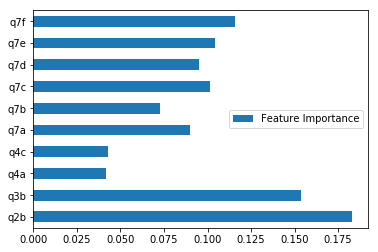

In [28]:
# looking at feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=data_q2_train.columns[:-1]).plot(kind='barh')

In [29]:
# reducing the data to 2 dimensions for visualization
pca = PCA(n_components=2).fit(data_q2_test.ix[:,:-2])
data2d = pca.transform(data_q2_test.ix[:,:-2])

In [30]:
# adding principal components scores as columns
viz_data = data_q2_test.copy()
viz_data['pc1'] = data2d[:, 0]
viz_data['pc2'] = data2d[:, 1]
viz_data.head()

,q2b,q3b,q4a,q4c,q7a,q7b,q7c,q7d,q7e,q7f,actual_identity,predicted_identity,pc1,pc2
2202,2,2,1,1,3,2,2,2,2,2,2,3,-1.129779,-1.631025
1128,3,3,1,1,1,1,3,3,3,1,3,1,-0.878442,-0.531010
2091,3,3,0,1,2,2,2,2,2,2,3,1,-1.111658,-0.305807
470,3,3,1,1,2,2,2,2,2,2,1,1,-1.035345,-0.241446
4454,1,9,1,1,8,1,1,1,1,1,2,1,0.645672,3.451149


In [31]:
# replacing numbers with words
viz_data.actual_identity.replace(to_replace=1, value="Gay", inplace=True)
viz_data.actual_identity.replace(to_replace=2, value="Lesbian", inplace=True)
viz_data.actual_identity.replace(to_replace=3, value="Bisexual", inplace=True)
viz_data.predicted_identity.replace(to_replace=1, value="Gay", inplace=True)
viz_data.predicted_identity.replace(to_replace=2, value="Lesbian", inplace=True)
viz_data.predicted_identity.replace(to_replace=3, value="Bisexual", inplace=True)

In [32]:
# modified comparePlot function from in-class notebook 9
def comparePlot(input_frame,real_column,predicted_column):
    df_a = input_frame.copy()
    df_b = input_frame.copy()
    df_a['label_source'] = 'actual identity'
    df_b['label_source'] = 'predicted identity'
    df_a['label'] = df_a[real_column]
    df_b['label'] = df_b[predicted_column].apply(lambda x: 'Predict %s'%x)
    df_c = pd.concat((df_a, df_b), axis=0, ignore_index=True)
    sns.lmplot(x='pc1', y='pc2', col='label_source',
               hue='label', data=df_c, scatter_kws={"alpha":0.4}, fit_reg=False, size=4);

##### Answer

The random forest classifier I trained was able to predict a respondent's sexual identity as gay, lesbian, or bisexual with about 45-50% accuracy -- a plot comparing respondents' actual and predicted identities is shown below. While this constitutes an improvement over a totally random guess (which would theoretically yield 33% accuracy overall), the accuracy rate is still pretty low, suggesting that an individual's identity is not strongly tied to their stances on LGBT issues. 
<p>The classifier performed the best in predicting people who identified as 'Gay', getting 406/555 (73%) correct, and worst in predicting 'Bisexual', with only 11/164 (6.7%) correct. The most important features were q2b ("To what degree are LGBT organizations addressing the three most important issues facing you?") and q3b ("To what degree are LGBT organizations addressing the three most important issues facing LGBT communities of color?") 
<p>Given the low accuracy overall, I would say that the answer to Q2 ("Is it possible to predict someone's sexual identity with reasonable accuracy based on their stances on issues affecting LGBT people?") is "no" -- at least not in the way they were measured using this survey.

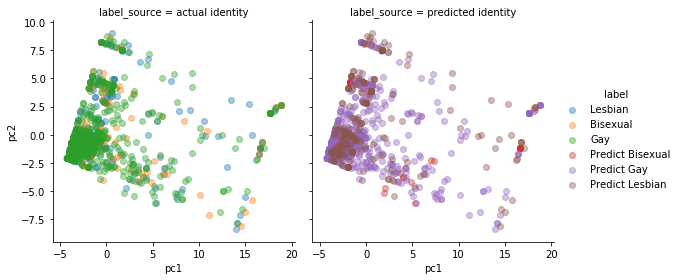

In [33]:
comparePlot(viz_data,"actual_identity","predicted_identity")

#### Q3. Do older LGBT people of color tend to be more politically conservative?

##### Annotated Code

In [34]:
from scipy import stats

In [35]:
# creating a df with just q21a and q18g
data_q3 = data[['q21a', 'q18g']]
data_q3.head()

,q21a,q18g
0,1,1988
1,2,1987
2,3,1959
3,1,1988
4,,1990


In [36]:
# filling blank entries with 9 and convering everything to int
data_q3 = data_q3.replace(to_replace=" ", value="9").astype(int)

In [37]:
# filtering out observations with missing values
data_q3 = data_q3[data_q3.q21a != 9]
data_q3 = data_q3[data_q3.q18g != 9]
data_q3 = data_q3[data_q3.q18g != 99]
data_q3.describe()

,q21a,q18g
count,4462.000000,4462.000000
mean,2.160242,1974.473330
std,1.267109,13.035536
min,1.000000,1926.000000
25%,1.000000,1965.000000
50%,2.000000,1977.000000
75%,3.000000,1985.000000
max,6.000000,1997.000000


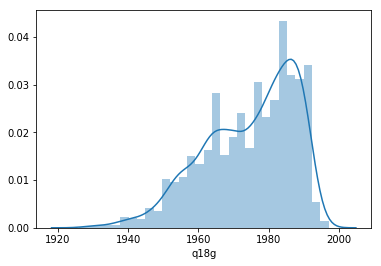

In [38]:
# distribution of birth years
sns.distplot(data_q3.q18g)

In [39]:
# cutting at the median year (1977) into older and younger people
young = data_q3.q18g > 1977
young = young.astype(int)
data_q3["young"] = young
data_q3.head()

,q21a,q18g,young
0,1,1988,1
1,2,1987,1
2,3,1959,0
3,1,1988,1
5,1,1971,0


In [40]:
# summary statistics for the two categories
data_q3.groupby(young).describe().stack()

q21a         q18g   young
q18g                                        
0    count  2271.000000  2271.000000  2271.0
     mean      2.145751  1963.921620     0.0
     std       1.241847     9.481028     0.0
     min       1.000000  1926.000000     0.0
     25%       1.000000  1958.000000     0.0
     50%       2.000000  1965.000000     0.0
     75%       2.000000  1971.000000     0.0
     max       6.000000  1977.000000     0.0
1    count  2191.000000  2191.000000  2191.0
     mean      2.175262  1985.410315     1.0
     std       1.292885     4.222906     0.0
     min       1.000000  1978.000000     1.0
     25%       1.000000  1982.000000     1.0
     50%       2.000000  1986.000000     1.0
     75%       3.000000  1989.000000     1.0
     max       6.000000  1997.000000     1.0

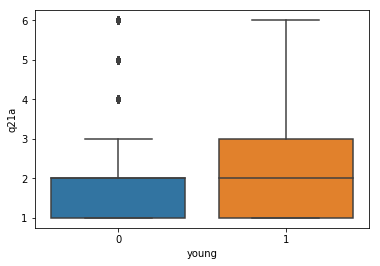

In [41]:
# box plot
sns.boxplot(x=data_q3.young, y=data_q3.q21a)

In [43]:
# t-test comparing group means
stats.ttest_ind(data_q3[data_q3.young == 0]['q21a'],data_q3[data_q3.young == 1]['q21a'])

Ttest_indResult(statistic=-0.7777239684939579, pvalue=0.4367730108307971)

##### Answer

Examination of the summary statistics and visualizations (box plot and violin plot) make it clear that the distributions of answers to q21a ("Thinking about politics, which of the following best describes your political views?") for respondents born before and after 1977 are practically identical. If anything, people born after 1977 could be taken to be _more_ conservative with a slightly higher (more conservative) group mean (2.18 for younger respondents vs. 2.15 for older respondents) and 75th percentile value of 3 ("Slightly liberal") as opposed to a 75th percentile value of 2 ("Liberal") for older respondents. The t-test showed no significant two-sided difference in group mean between the two categories, so I would answer this question with a resounding "no": older LGBT people of color do not tend to be more politically conservative than their younger counterparts.

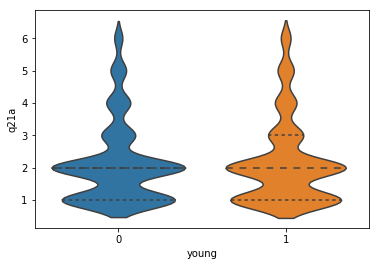

In [44]:
sns.violinplot(y=data_q3.q21a, x = data_q3.young, inner='quart')

#### Q4. When respondents are clustered based on their patterns of involvement in LGBT and POC groups, organizations, and activities, are the resulting clusters diverse with respect to age? What are the characteristics of the clusters?

##### Annotated Code

In [45]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [46]:
# demogs_q4 = data[["GenderID", "Racecat", "CisGender", "Age3"]]
data_q4 = data[["q8a", "q8b", "q8c", "q8d", "q8e", "q8f", "q9a", "q9b", "q9c", "q9d", 
                "q9e", "q9f", "q10a", "q10b", "q10c", "q10d", "q10e", "q10f", "q18g"]]

data_q4.ix[:,:-4].head()

,q8a,q8b,q8c,q8d,q8e,q8f,q9a,q9b,q9c,q9d,q9e,q9f,q10a,q10b,q10c
0,1,4,6,6,2,1,1,6,6,6,2,1,1,3,6
1,4,5,3,4,2,2,1,3,5,5,1,1,2,4,3
2,3,3,6,6,3,3,2,2,5,6,3,3,3,3,5
3,3,2,6,6,2,3,2,4,5,6,4,2,3,2,5
4,2,3,6,6,4,2,2,2,6,6,1,1,1,1,1


In [47]:
data_q4 = data_q4.replace(to_replace=" ", value="9").astype(int)
col_names = data_q4.columns.tolist()
for col in col_names:
    data_q4 = data_q4[data_q4[col] != 9]
    data_q4 = data_q4[data_q4[col] != 99]
data_q4.describe()

,q8a,q8b,q8c,q8d,q8e,q8f,q9a,q9b,q9c,q9d,q9e,q9f,q10a,q10b,q10c,q10d,q10e,q10f,q18g
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2.103776,3.230308,4.073018,4.710178,2.604401,2.543636,1.980245,2.764191,3.389347,3.824206,2.296824,2.258565,1.892723,2.546637,3.034759,3.539885,2.069267,2.078770,1974.930983
std,1.194235,1.486044,1.667351,1.726924,1.759286,1.382385,1.200242,1.504423,1.795218,1.983260,1.672144,1.389470,1.178957,1.501796,1.828993,2.038977,1.550856,1.356085,12.916294
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1919.000000
25%,1.000000,2.000000,3.000000,4.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1966.000000
50%,2.000000,3.000000,4.000000,6.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1978.000000
75%,2.000000,4.000000,6.000000,6.000000,4.000000,3.000000,2.000000,4.000000,5.000000,6.000000,3.000000,3.000000,2.000000,3.000000,5.000000,6.000000,3.000000,2.000000,1986.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1997.000000


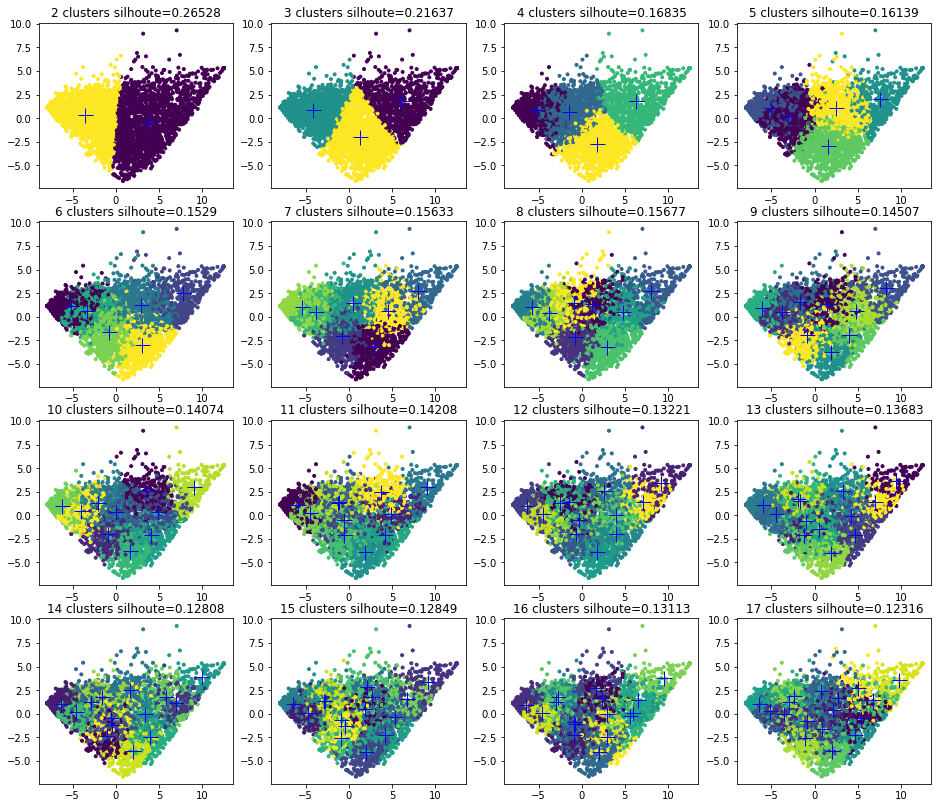

In [51]:
pca = PCA(n_components=2).fit(data_q4.ix[:,:-1])
data2d = pca.transform(data_q4.ix[:,:-1])

plt.figure(figsize=(16, 14))
scores, n_clusters, preds = [], [], []
for i in range(2, 18):
    kmean = KMeans(n_clusters = i).fit(data_q4.ix[:,:-1])
    scores.append(kmean.score(data_q4.ix[:,:-1]))
    n_clusters.append(i)
    pred = kmean.predict(data_q4.ix[:,:-1])
    preds.append(pred)
    plt.subplot(4, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data_q4.ix[:,:-1], pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

(1, 17.75)

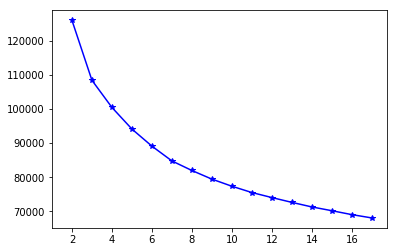

In [52]:
cost = []
for k in range(2,18):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data_q4.ix[:,:-1])
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,18), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

In [53]:
# let's go with 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_q4.ix[:,:-1])
cluster = kmeans.labels_

In [54]:
# adding cluster as a column to the dataframe
data_q4['cluster'] = cluster
data_q4.head()

,q8a,q8b,q8c,q8d,q8e,q8f,q9a,q9b,q9c,q9d,q9e,q9f,q10a,q10b,q10c,q10d,q10e,q10f,q18g,cluster
0,1,4,6,6,2,1,1,6,6,6,2,1,1,3,6,6,2,1,1988,1
1,4,5,3,4,2,2,1,3,5,5,1,1,2,4,3,4,1,1,1987,4
2,3,3,6,6,3,3,2,2,5,6,3,3,3,3,5,6,3,3,1959,1
3,3,2,6,6,2,3,2,4,5,6,4,2,3,2,5,5,5,2,1988,5
4,2,3,6,6,4,2,2,2,6,6,1,1,1,1,1,1,1,1,1990,7


In [62]:
# creating mean indicators for easier interpretation
# q8: lgbt groups/orgs
data_q4_lgbt = data_q4[["q8a", "q8b", "q8c", "q8d", "q8e", "q8f"]]
lgbt = data_q4_lgbt.mean(axis=1)

# q9: poc groups/orgs
data_q4_poc = data_q4[["q9a", "q9b", "q9c", "q9d", "q9e", "q9f"]]
poc = data_q4_poc.mean(axis=1)

# q10: lgbt+poc groups/orgs
data_q4_lgbtpoc = data_q4[["q10a", "q10b", "q10c", "q10d", "q10e", "q10f"]]
lgbtpoc = data_q4_lgbtpoc.mean(axis=1)

In [63]:
# adding mean indicators to main df
data_q4['lgbt'] = lgbt
data_q4['poc'] = poc
data_q4['lgbtpoc'] = lgbtpoc

In [64]:
data_q4.groupby("cluster").lgbt.describe() 
# least involved: cluster 3, cluster 6, cluster 4
# most involved: cluster 2, cluster 7, cluster 5

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,598.0,3.236343,0.617065,2.000000,2.833333,3.166667,3.666667,6.000000
1,629.0,3.555379,0.521035,2.166667,3.166667,3.500000,3.833333,5.333333
2,349.0,4.789876,0.731044,2.333333,4.333333,4.833333,5.166667,6.000000
3,669.0,1.731440,0.485440,1.000000,1.333333,1.666667,2.000000,3.166667
4,538.0,2.765799,0.502614,1.000000,2.500000,2.666667,3.166667,4.333333
5,439.0,3.932043,0.557342,1.666667,3.500000,4.000000,4.333333,5.833333
6,425.0,2.707843,0.566413,1.000000,2.333333,2.666667,3.000000,4.166667
7,352.0,4.186553,0.650625,2.833333,3.666667,4.166667,4.500000,6.000000


In [65]:
data_q4.groupby("cluster").poc.describe() 
# least involved: cluster 0, cluster 3, cluster 4
# most involved: cluster 2, cluster 5, cluster 1

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,598.0,1.485786,0.482460,1.0,1.000000,1.333333,1.833333,3.333333
1,629.0,3.331744,0.551487,1.0,3.000000,3.333333,3.666667,5.000000
2,349.0,4.832378,0.714964,2.5,4.333333,4.833333,5.333333,6.000000
3,669.0,1.524165,0.517449,1.0,1.000000,1.500000,1.833333,3.666667
4,538.0,2.522924,0.553651,1.0,2.166667,2.500000,2.833333,4.500000
5,439.0,3.834093,0.641752,1.0,3.500000,3.833333,4.166667,6.000000
6,425.0,2.834510,0.736824,1.0,2.333333,2.666667,3.166667,6.000000
7,352.0,3.041667,0.748111,1.0,2.500000,3.000000,3.500000,6.000000


In [66]:
data_q4.groupby("cluster").lgbtpoc.describe()
# least involved: cluster 3, cluster 0, cluster 4
# most involved: cluster 2, cluster 5, cluster 1

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,598.0,1.335842,0.458031,1.000000,1.000000,1.166667,1.666667,4.000000
1,629.0,3.258082,0.515496,1.833333,2.833333,3.166667,3.666667,4.833333
2,349.0,4.784623,0.776418,2.166667,4.166667,4.833333,5.333333,6.000000
3,669.0,1.301694,0.385776,1.000000,1.000000,1.000000,1.500000,3.333333
4,538.0,2.325279,0.537192,1.000000,2.000000,2.333333,2.666667,3.833333
5,439.0,3.736143,0.586652,1.833333,3.333333,3.833333,4.166667,6.000000
6,425.0,2.563137,0.674968,1.000000,2.000000,2.500000,3.000000,5.333333
7,352.0,2.091383,0.693385,1.000000,1.666667,2.000000,2.666667,3.666667


In [67]:
# distributions of ages for each cluster
data_q4.groupby("cluster").q18g.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,598.0,1975.337793,12.899156,1932.0,1967.0,1979.0,1986.0,1995.0
1,629.0,1974.200318,11.929381,1937.0,1965.0,1976.0,1985.0,1994.0
2,349.0,1971.710602,14.114451,1919.0,1963.0,1973.0,1983.0,1995.0
3,669.0,1975.367713,13.313333,1931.0,1966.0,1979.0,1986.0,1997.0
4,538.0,1977.187732,11.601711,1929.0,1969.0,1980.0,1987.0,1994.0
5,439.0,1976.309795,12.539423,1931.0,1967.0,1980.0,1987.0,1997.0
6,425.0,1973.588235,13.820355,1934.0,1964.0,1976.0,1985.0,1995.0
7,352.0,1974.360795,13.050983,1935.0,1964.0,1977.0,1985.0,1995.0


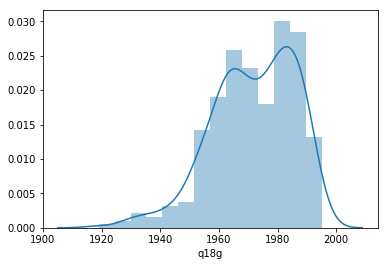

In [70]:
# most involved overall: cluster 2
cluster2 = data_q4[data_q4.cluster == 2]
sns.distplot(cluster2.q18g)

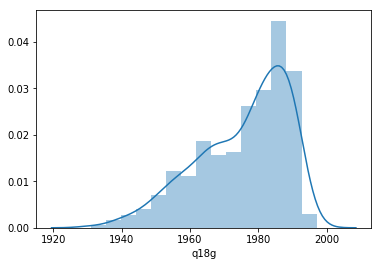

In [71]:
# least involved overall: cluster 3
cluster3 = data_q4[data_q4.cluster == 3]
sns.distplot(cluster3.q18g)

##### Answer

After filtering out people with missing responses, I obtained a final sample of 3,999 people for this question. Using 8 clusters seemed to provide a happy medium between simplicity and complexity; with more than 8 clusters, the silhouette score starts to decline and the elbow plot becomes very flat. The resulting clusters varied in size from 349 people (cluster 2) to 669 people (cluster 3).

<p>Some fascinating trends emerged when looking at the resulting clusters. The various dimensions of question 8 (q8a, q8b, etc.) represent involvement with groups, organizations, and activities for LGBT people (of any race/ethnicity). Looking at mean and median scores for question 8, we find that clusters 2, 7, and 5 were the most involved (ordered from most to least) while the least involved were clusters 3, 6, and 4 (ordered from least to most). Question 9 measured involvement with groups, organizations, and activities for POC (of any gender/sexual identity). Again, clusters 2 and 5 were highly involved, along with cluster 1. Among the least involved we again find clusters 3 and 4, along with cluster 0. Question 10 represented involvement with groups, organizations, and activities for LGBT POC. The most involved were clusters 2, 5, and 1, while the least involved were clusters 3, 0, and 4 (very similar to the results from question 9).
    
<p>To summarize, cluster 2 was the most involved for questions 8, 9, and 10. Clusters 5 and 1 were highly involved with respect to POC and LGBT POC groups, while cluster 7 was highly involved with respect to LGBT groups only. Clusters 3 and 4 had among the lowest involvement for all questions, along with cluster 6 for LGBT groups and cluster 0 with respect to POC and LGBT POC groups.
    
<p>To my surprise, involvement all-star cluster 2 was the oldest cluster on average, with a mean birth year in 1971 and median birth year in 1973. Since this survey was conducted in 2010, the median respondent in cluster 2 would be around 37 years old. A visual examination of the birth year distribution in the cluster reveals that it is bimodal, with peaks between 1960-1970, and 1980-1990:

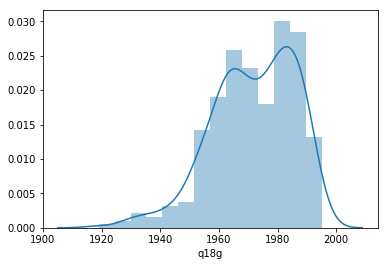

In [72]:
cluster2 = data_q4[data_q4.cluster == 2]
sns.distplot(cluster2.q18g)

Low-involvement clusters 3 and 4 were younger on average, with median birth years of 1979 and 1980 respectively. Examination of the histogram of birth years for low-involvement cluster 3 reveals that the distribution is heavily skewed with a fat tail:

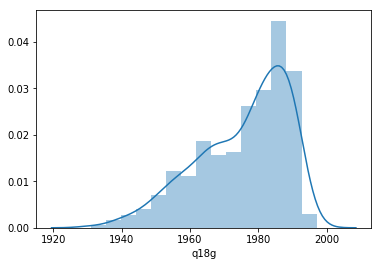

In [73]:
cluster3 = data_q4[data_q4.cluster == 3]
sns.distplot(cluster3.q18g)